In [ ]:
#Facial Biometric
#Dataset

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np   # bring NumPy library into the current environment and give NumPy the alias of np
import cv2
img_size=224  # define the imagae size

#Face Recognition

In [2]:
# importing the libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model

read all the images and converting them to array


In [119]:
#Transfering 7 folders of Train set to a Python list with 7 length including the target
patht,dirst,filest=next(os.walk("/Users/behroozabbaszadeh/Facedetect/newdata/train/"))
train_data=[]
train_target=[]
Classes=dirst
for category in dirst:
    path = os.path.join(patht, category)
    class_num = Classes.index(category) 
    training_Data=[]
    training_target=[]
    for img in os.listdir(path):
      
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        new_array = cv2.resize(backtorgb, (img_size, img_size))
        training_Data.append(new_array)
        training_target.append( class_num)
      except Exception as e:
        print(e)
        pass
    train_data.append(training_Data)
    train_target.append(training_target)

OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



In [120]:
# creating a train set in numpy and then convert it to Tensor

Train_data = np.empty((0,img_size,img_size,3),dtype=int)
ytrain = np.empty((0,),dtype=int)
for i in range(len(train_data)):


    Train_data = np.concatenate((Train_data, train_data[i]))
    ytrain = np.concatenate((ytrain, train_target[i]))


u_train = tf.convert_to_tensor(Train_data) #convert numpy (train set) to Tensor
u_traintarget = tf.convert_to_tensor(ytrain) #convert numpy (target test) to Tensor
    


In [ ]:
# Normalizing the data to speed up the learning and faster convergence
u_train=u_train/255.0

In [ ]:
# Transfering the Test set from 7 folders to a Python list with 7 length including the target

patht,dirst,filest=next(os.walk("/Users/behroozabbaszadeh/Facedetect/newdata/test/"))
test_data=[]
test_target=[]
Classes=dirst
for category in dirst:
    path = os.path.join(patht, category)
    class_num = Classes.index(category) 
    testing_Data=[]
    testing_target=[]
    for img in os.listdir(path):
      
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        new_array = cv2.resize(backtorgb, (img_size, img_size))
        testing_Data.append(new_array)
        testing_target.append( class_num)
      except Exception as e:
        print(e)
        pass
    test_data.append(testing_Data)
    test_target.append(testing_target)

In [ ]:
# creating a test set in numpy and then convert it to Tensor

Test_data = np.empty((0,img_size,img_size,3),dtype=int)
ytest = np.empty((0,),dtype=int)
for i in range(len(test_data)):


    Test_data = np.concatenate((Test_data, test_data[i]))
    ytest = np.concatenate((ytest, test_target[i]))


u_test = tf.convert_to_tensor(Test_data) #convert numpy (test set) to Tensor
u_testtarget = tf.convert_to_tensor(ytest) #convert numpy (target test) to Tensor

In [ ]:
# building a CNN using TensorFlow

model=tf.keras.applications.MobileNetV2()
base_input=model.layers[0].input
base_output=model.layers[-2].output
final_output=layers.Dense(128)(base_output)
final_ouput=layers.Activation("relu")(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation("relu")(final_output)
final_output=layers.Dense(7,activation="softmax")(final_output)
new_model=keras.Model(inputs=base_input,outputs=final_output)
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
# explore the summary of the model
new_model.summary()

In [15]:
# train the model with traning data set
new_model.fit(u_train,u_traintarget,epochs=25)

Epoch 1/25
898/898 [==============================] - 2485s 3s/step - loss: 1.2774 - accuracy: 0.5202
Epoch 2/25
898/898 [==============================] - 2376s 3s/step - loss: 1.0803 - accuracy: 0.5963
Epoch 3/25
898/898 [==============================] - 2328s 3s/step - loss: 1.0045 - accuracy: 0.6267
Epoch 4/25
898/898 [==============================] - 2232s 2s/step - loss: 0.9483 - accuracy: 0.6478
Epoch 5/25
898/898 [==============================] - 2231s 2s/step - loss: 0.8918 - accuracy: 0.6718
Epoch 6/25
898/898 [==============================] - 2225s 2s/step - loss: 0.8532 - accuracy: 0.6827
Epoch 7/25
898/898 [==============================] - 2231s 2s/step - loss: 0.8056 - accuracy: 0.7059
Epoch 8/25
898/898 [==============================] - 2234s 2s/step - loss: 0.7419 - accuracy: 0.7243
Epoch 9/25
898/898 [==============================] - 2234s 2s/step - loss: 0.6918 - accuracy: 0.7458
Epoch 10/25
898/898 [==============================] - 2241s 2s/step - loss: 0.650

In [17]:
new_model.save('Final_model_95.h5')   # we can save the model and then reload it again. we do not need to do but if we want we can save it and use it later

In [3]:
NEW_model=tf.keras.models.load_model('Final_model_95.h5') # load the saved model for testing

2022-06-27 06:17:13.516851: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# The result of prediction (target) based on test set input 
Predictions=NEW_model.predict(u_test)  

ValueError: in user code:

    File "/Users/behroozabbaszadeh/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/Users/behroozabbaszadeh/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/behroozabbaszadeh/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/behroozabbaszadeh/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/Users/behroozabbaszadeh/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/behroozabbaszadeh/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "model_11" (type Functional).
    
    Input 0 of layer "conv2d_1" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 48)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 48), dtype=int64)
      • training=False
      • mask=None


In [19]:
# Returning the indices of the MAX value

MAX_Index = np.zeros(len(Predictions), dtype=int)

for i in range (len(Predictions)):
    r=np.argmax(Predictions[i])
    
    MAX_Index[i]=r
    


In [191]:
# delete
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(u_testtarget, tt)

0.4369133634430801

In [21]:
np.shape(ytest)


(7176,)

In [200]:
# maybe delete
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0
Prediction=new_model.predict(final_image)
np.argmax(Prediction)

5

The link for setting up CoLAb GPU
https://medium.com/dataman-in-ai/start-using-google-colab-free-gpu-7968acb7ef92


In [22]:
# Using confusion matrix to evaluate where errors in the model were made

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
cm = confusion_matrix(ytest, MAX_Index)
cm_df = pd.DataFrame(cm,
                     index = ['HA','SA','FE','SU','NE','AN','DI'], 
                     columns = ['HA','SA','FE','SU','NE','AN','DI'])

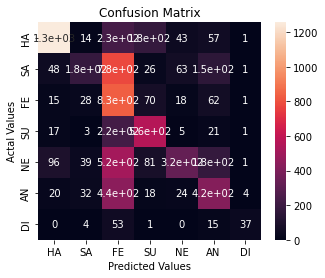

In [23]:
#Plotting the confusion matrix for multiple classes

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

/var/folders/ks/l13bjd_n7lxglzbttng3p1zc0000gp/T/ipykernel_51494/3903646957.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  NORM=cm / cm.astype(np.float).sum(axis=1)


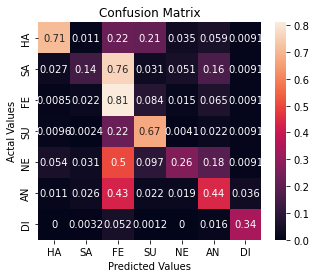

In [26]:
# Normalizing the confusion matrix

NORM=cm / cm.astype(np.float).sum(axis=1)
NORM_df = pd.DataFrame(NORM,
                     index = ['HA','SA','FE','SU','NE','AN','DI'], 
                     columns = ['HA','SA','FE','SU','NE','AN','DI'])

plt.figure(figsize=(5,4))
sns.heatmap(NORM_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()